In [8]:
import time
import matplotlib.pyplot as plt

In [9]:
factorial_energies = []
fibonacci_energies = []

# Calculating the energy

class EnergyMeter:
    def __init__(self):
        self.operations = 0

    def reset(self):
        self.operations = 0

    def increment(self, count=1):
        self.operations += count

    def get_operations(self):
        return self.operations

# Global energy meter instance
energy_meter = EnergyMeter()

In [10]:
# Factorial function
def factorial(n):
  # simulation
    energy_meter.increment()
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)

# Fibonacci function
def fibonacci(n):
    # simulation
    energy_meter.increment()

    if n <= 1:
        return n
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

# Energy consumption for both functions and compare
def compare_energy(n):

    energy_meter.reset()
    start_time = time.time()

    factorial(n)

    factorial_energy = energy_meter.get_operations()
    factorial_time = time.time() - start_time

    energy_meter.reset()

    start_time = time.time()
    fibonacci(n)

    fibonacci_energy = energy_meter.get_operations()
    fibonacci_time = time.time() - start_time

    print(f"Factorial({n}): Operations = {factorial_energy}, Time = {factorial_time:.6f} seconds")
    print(f"Fibonacci({n}): Operations = {fibonacci_energy}, Time = {fibonacci_time:.6f} seconds")

    return factorial_energy, fibonacci_energy, factorial_time, fibonacci_time



Factorial(1): Operations = 1, Time = 0.000018 seconds
Fibonacci(1): Operations = 1, Time = 0.000002 seconds
Factorial(2): Operations = 2, Time = 0.000008 seconds
Fibonacci(2): Operations = 3, Time = 0.000004 seconds
Factorial(3): Operations = 3, Time = 0.000007 seconds
Fibonacci(3): Operations = 5, Time = 0.000005 seconds
Factorial(4): Operations = 4, Time = 0.000007 seconds
Fibonacci(4): Operations = 9, Time = 0.000008 seconds
Factorial(5): Operations = 5, Time = 0.000010 seconds
Fibonacci(5): Operations = 15, Time = 0.000012 seconds
Factorial(6): Operations = 6, Time = 0.000007 seconds
Fibonacci(6): Operations = 25, Time = 0.000016 seconds
Factorial(7): Operations = 7, Time = 0.000006 seconds
Fibonacci(7): Operations = 41, Time = 0.000025 seconds
Factorial(8): Operations = 8, Time = 0.000007 seconds
Fibonacci(8): Operations = 67, Time = 0.000042 seconds
Factorial(9): Operations = 9, Time = 0.000007 seconds
Fibonacci(9): Operations = 109, Time = 0.000080 seconds
Factorial(10): Operati

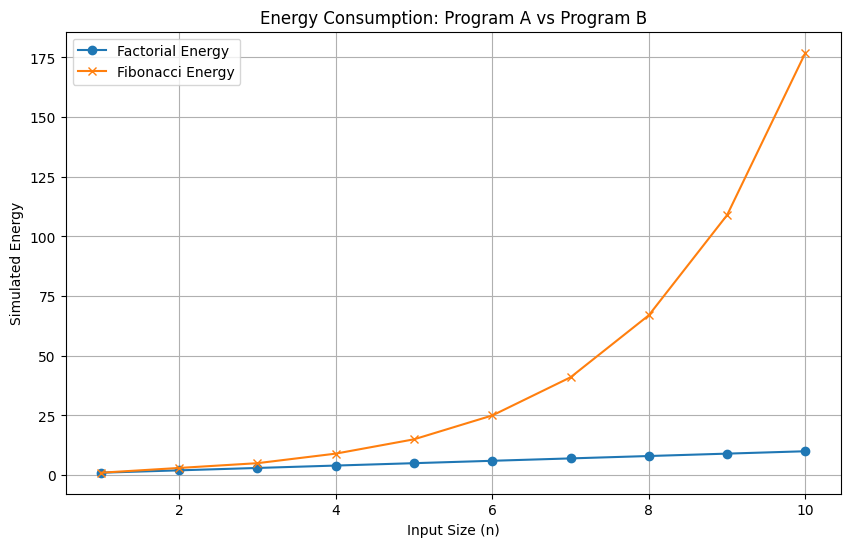

In [12]:
def plot_energy_comparison(max_n):
    factorial_energies = []
    fibonacci_energies = []
    input_sizes = list(range(1, max_n + 1))

    for n in input_sizes:
        factorial_energy, fibonacci_energy, _, _ = compare_energy(n)
        factorial_energies.append(factorial_energy)
        fibonacci_energies.append(fibonacci_energy)


    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, factorial_energies, label="Factorial Energy", marker="o")
    plt.plot(input_sizes, fibonacci_energies, label="Fibonacci Energy", marker="x")
    plt.xlabel("Input Size (n)")
    plt.ylabel("Simulated Energy")
    plt.title("Energy Consumption: Program A vs Program B")
    plt.legend()
    plt.grid(True)
    plt.show()

    return factorial_energies, fibonacci_energies

factorial_energies, fibonacci_energies = plot_energy_comparison(10)


In [6]:
print(len(factorial_energies))

10


In [14]:
def compare_programs_with_dtw(program_a_data, program_b_data):

    program_a_data = normalize(program_a_data)
    program_b_data = normalize(program_b_data)

    #  DTW distance matrix
    n, m = len(program_a_data), len(program_b_data)
    dtw_matrix = [[float('inf')] * (m + 1) for _ in range(n + 1)]
    dtw_matrix[0][0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = (program_a_data[i - 1] - program_b_data[j - 1]) ** 2
            dtw_matrix[i][j] = cost + min(dtw_matrix[i - 1][j],    # Insertion
                                          dtw_matrix[i][j - 1],    # Deletion
                                          dtw_matrix[i - 1][j - 1])  # Match


    return dtw_matrix[n][m]



In [16]:

def normalize(data):
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) for x in data]

program_a_data = factorial_energies
program_b_data = fibonacci_energies

dtw_distance = compare_programs_with_dtw(program_a_data, program_b_data)
print(f"DTW similarity index ( Program A and Program B) : {dtw_distance}")

DTW similarity index ( Program A and Program B) : 0.0564036832976227
